# About the Dataset

Dataset Source: https://www.kaggle.com/datasets/new-york-city/nyc-property-sales/

## Context
This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

## Content
This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. See the glossary linked to below.
For further reference on individual fields see the Glossary of Terms. For the building classification codes see the Building Classifications Glossary.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

# Preprocessing Dataset

In [24]:
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/didan/nyc-rolling-sales.csv")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [4]:
df.shape

(84548, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
# Menghapus kolom yang tidak diperlukan
df.drop(['Unnamed: 0', 'EASE-MENT'], axis=1, inplace=True)
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [7]:
# Mengubah type data object menjadi category
category = [
    'BOROUGH',
    'NEIGHBORHOOD',
    'BUILDING CLASS CATEGORY',
    'TAX CLASS AT PRESENT',
    'BUILDING CLASS AT PRESENT',
    'ZIP CODE',
    'YEAR BUILT',
    'TAX CLASS AT TIME OF SALE',
    'BUILDING CLASS AT TIME OF SALE'
]
for col in category:
    df[col] = df[col].astype('category')

In [8]:
# Mengubah int menjadi numeric dan (-) menjadi NaN
df['SALE PRICE']= pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

# Mengubah type data SALE DATE dari Object menjadi Date
df["SALE DATE"] = pd.to_datetime(df["SALE DATE"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  category      
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [10]:
# Mengubah kode digit pada kolom borough menjadi nama area
borough_rename = {1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}
df['BOROUGH'] = df['BOROUGH'].replace(borough_rename)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [11]:
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,6.998700e+04
mean,4237.218976,376.224015,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1.276456e+06
std,3568.263407,658.136814,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,1.140526e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1322.750000,22.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,2.250000e+05
50%,3311.000000,50.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,5.300000e+05
75%,6281.000000,1001.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,9.500000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


In [12]:
# Memeriksa jumlah missing value 
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [13]:
# Mengubah semua nilai (-) dengan NaN
df.replace('-',np.nan, inplace=True)
# Mengubah semua nilai spasi kosong " " dengan NaN 
df.replace(' ',np.nan, inplace=True)

In [14]:
# Mengisi missing value dengan modus
df['BUILDING CLASS AT PRESENT'].fillna(df['BUILDING CLASS AT PRESENT'].mode()[0], inplace=True)
df['TAX CLASS AT PRESENT'].fillna(df['TAX CLASS AT PRESENT'].mode()[0], inplace=True)

# Mengisi missing value di kolom "LAND SQUARE FEET" dengan nilai mean
df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean(), inplace=True)

# Mengisi missing value di kolom "GROSS SQUARE FEET" dengan nilai mean
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean(), inplace=True)

# Mengisi missing value di kolom "GROSS SQUARE FEET" dengan nilai median
df['SALE PRICE'].fillna(df['SALE PRICE'].median(), inplace=True)

In [15]:
# Menghilangkan outlier SALE PRICE 
df = df.drop(df[df['SALE PRICE'] < 100].index)

<Axes: xlabel='SALE PRICE', ylabel='TOTAL UNITS'>

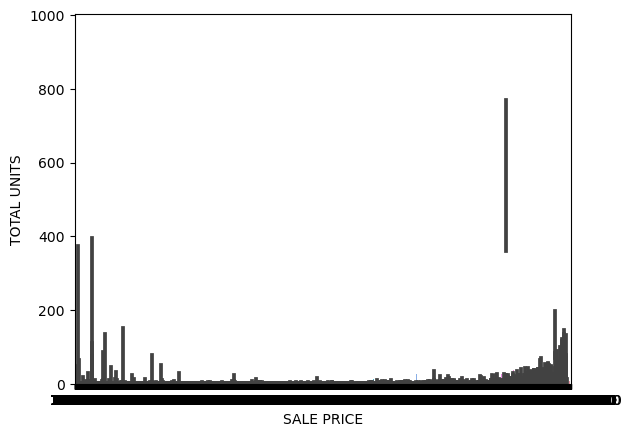

In [19]:
#Membuat Boxplot
sns.barplot(x=df['SALE PRICE'], y=df['TOTAL UNITS'])

Data terdapat outlier

# Measure of Central Tendency

## Mean

Rata - rata harga properti di tiap borough

In [25]:
# rata-rata harga jual properti berdasarkan Borough
borough_data = df.groupby(['BOROUGH']).mean()
borough_data = borough_data['SALE PRICE']
borough_data

BOROUGH
Manhattan        2.764273e+06
Bronx            8.217014e+05
Brooklyn         1.303471e+06
Queens           6.815384e+05
Staten Island    5.466490e+05
Name: SALE PRICE, dtype: float64

Urutan rata-rata dari harga jual properti tertinggi sampai terendah :
1. Manhattan
2. Brooklyn
3. Bronx
4. Queens
5. State Island

## Median

Perbedaan median ukuran properti luas total semua lantai bangunan (GROSS SQUARE FEET) antar borough.

In [26]:
median = df.groupby(['BOROUGH']).median()
median = median['GROSS SQUARE FEET']
median

BOROUGH
Manhattan        4045.707479
Bronx            1664.000000
Brooklyn         1219.000000
Queens           2438.000000
Staten Island    1800.000000
Name: GROSS SQUARE FEET, dtype: float64

## Modus

In [31]:
modus = df['BUILDING CLASS CATEGORY'].value_counts().sort_values(ascending=False)
modus

01 ONE FAMILY DWELLINGS                         16524
02 TWO FAMILY DWELLINGS                         12665
10 COOPS - ELEVATOR APARTMENTS                  12582
13 CONDOS - ELEVATOR APARTMENTS                 12340
03 THREE FAMILY DWELLINGS                        3054
09 COOPS - WALKUP APARTMENTS                     2702
07 RENTALS - WALKUP APARTMENTS                   2434
04 TAX CLASS 1 CONDOS                            1453
17 CONDO COOPS                                   1198
15 CONDOS - 2-10 UNIT RESIDENTIAL                1104
05 TAX CLASS 1 VACANT LAND                        961
12 CONDOS - WALKUP APARTMENTS                     841
44 CONDO PARKING                                  831
22 STORE BUILDINGS                                688
43 CONDO OFFICE BUILDINGS                         447
14 RENTALS - 4-10 UNIT                            443
29 COMMERCIAL GARAGES                             400
31 COMMERCIAL VACANT LAND                         357
47 CONDO NON-BUSINESS STORAG

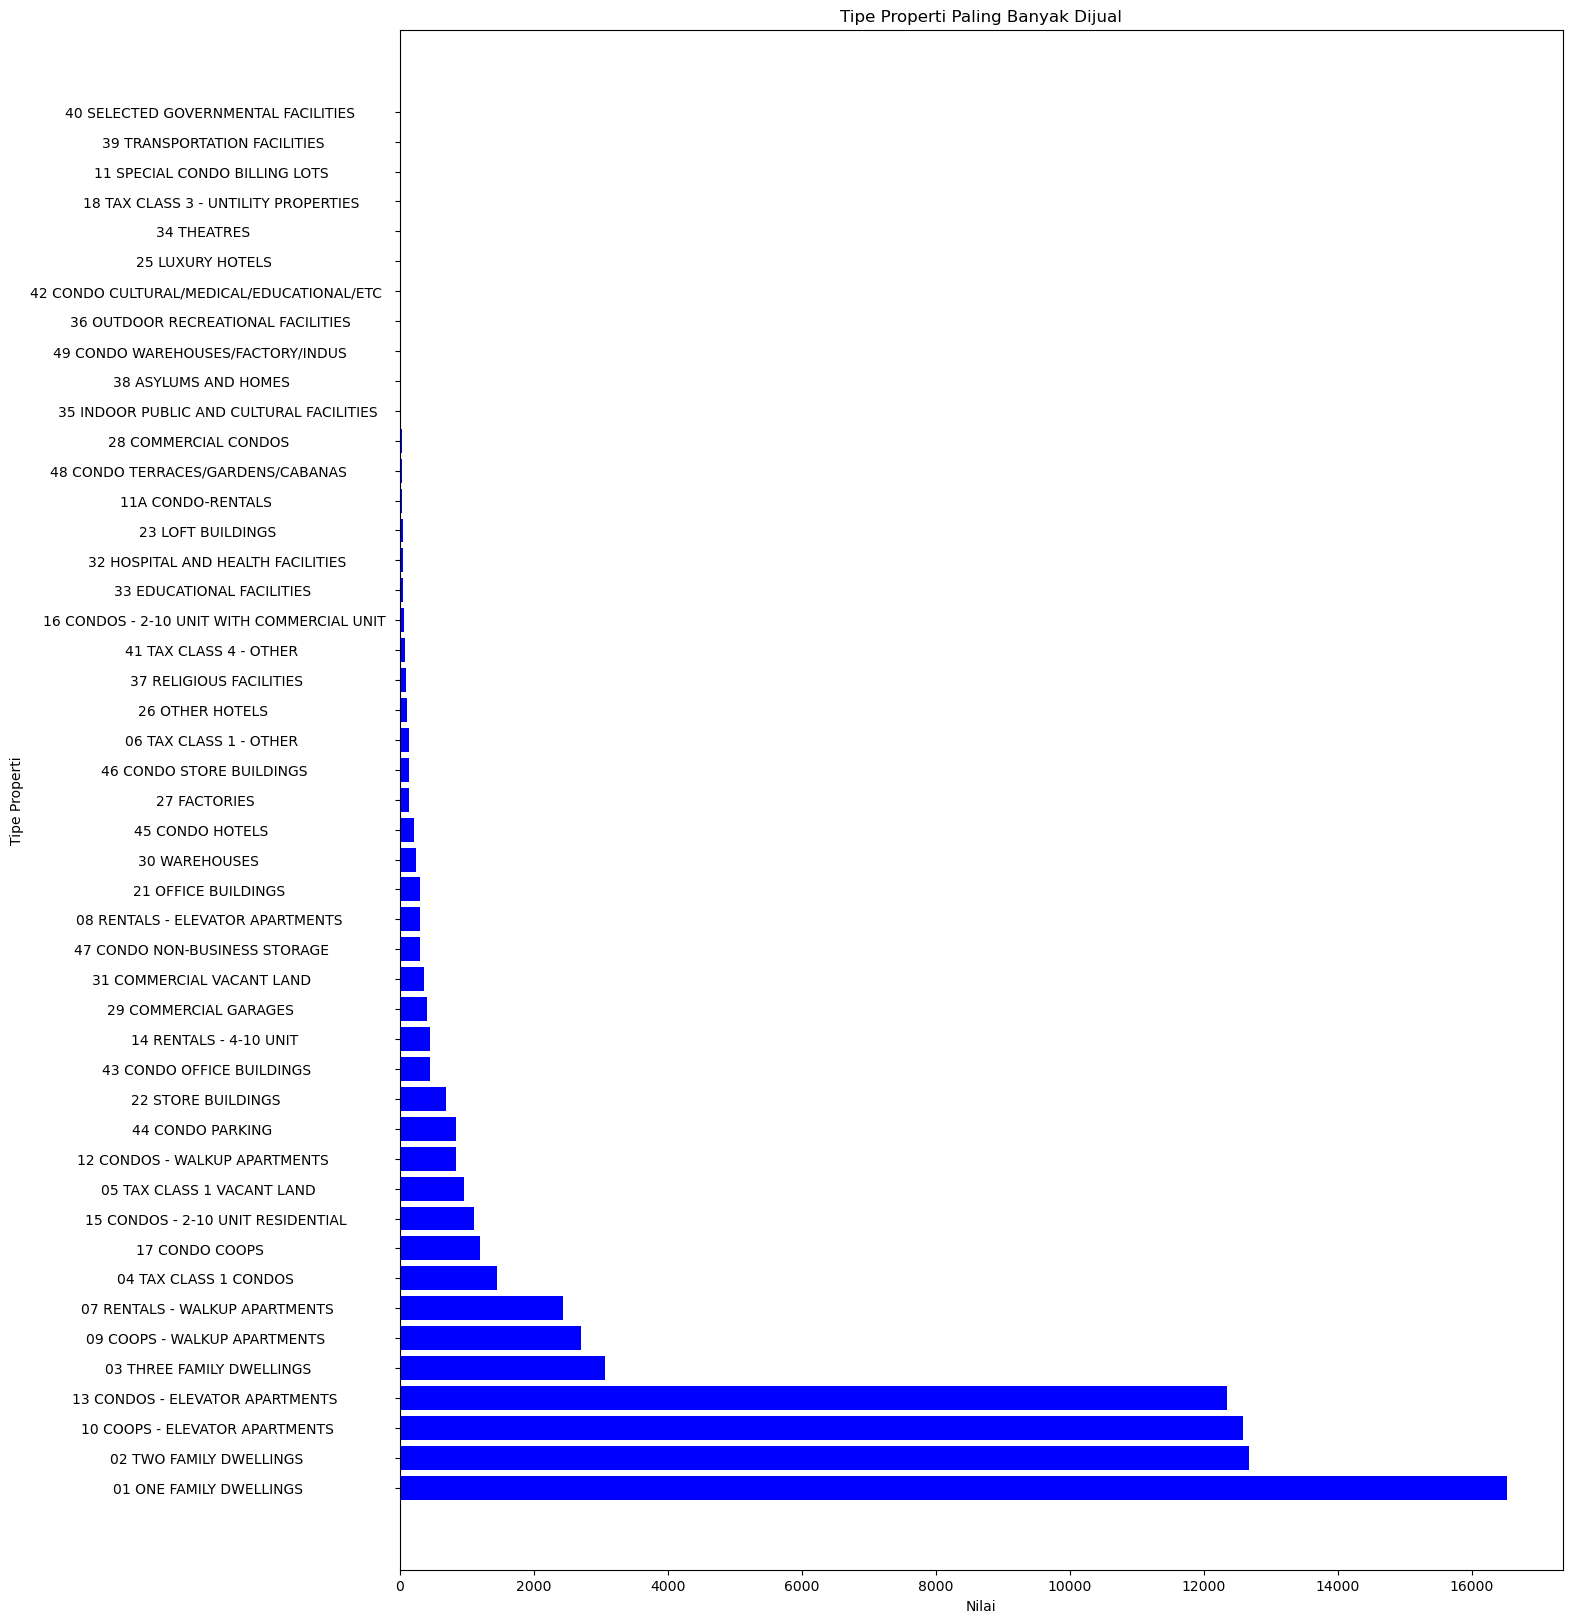

In [34]:
# Membuat plot bar
plt.figure(figsize=(15, 20))
bars = plt.barh(modus.index, modus.values, color='blue')

# Menambahkan label dan judul
plt.xlabel('Nilai')
plt.ylabel('Tipe Properti')
plt.title('Tipe Properti Paling Banyak Dijual')

# Menampilkan plot
plt.show()

3 tipe yang paling banyak dijual:
    
1. 01 ONE FAMILY DWELLINGS
2. 02 TWO FAMILY DWELLINGS
3. 10 COOPS - ELEVATOR APARTMENTS

# Measure of Spread

## Range

In [35]:
# Menghitung rentang (range), nilai minimum, dan maksimum SALE PRICE untuk tiap borough
range = df.groupby('BOROUGH')['SALE PRICE'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
range.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']

# Menampilkan nilai rentang SALE PRICE, nilai minimum, dan maksimum untuk tiap borough
print("'Range, Minimum, dan Maximum SALE PRICE per Borough'\n")
print(range)

'Range, Minimum, dan Maximum SALE PRICE per Borough'

         BOROUGH  Minimum       Maximum         Range
0      Manhattan    100.0  2.210000e+09  2.210000e+09
1          Bronx    100.0  1.100000e+08  1.099999e+08
2       Brooklyn    100.0  3.450000e+08  3.449999e+08
3         Queens    100.0  2.575000e+08  2.574999e+08
4  Staten Island    100.0  1.220000e+08  1.219999e+08


## Variance

In [39]:
# nilai varians 'RESIDENTIAL UNITS'
var1 = df['RESIDENTIAL UNITS'].var()
# nilai varians'COMMERCIAL UNITS'
var2= df['COMMERCIAL UNITS'].var()

# perbandingan varians
print(f"Varians 'RESIDENTIAL UNITS': {var1}")
print(f"Varians 'COMMERCIAL UNITS': {var2}")

# Menghitung perbandingan varians
var_ratio = var1 / var2

print(f"Perbandingan Nilai Varians: {var_ratio}")

Varians 'RESIDENTIAL UNITS': 280.5985909891014
Varians 'COMMERCIAL UNITS': 86.59810517122247
Perbandingan Nilai Varians: 3.2402393843872175


## Standard Deviation

In [41]:
std = np.std(df['TOTAL UNITS'])
print("Standar Deviation TOTAL UNITS Score :",std)

Standar Deviation TOTAL UNITS Score : 19.285005507161898


# Probability Distribution

In [42]:
df.drop(['ADDRESS','APARTMENT NUMBER', 'SALE DATE'], axis = 1, inplace=True)
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,10009,28,3,31,4616.0,18690.0,1900,2,C7,530000.0
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009,16,1,17,2212.0,7803.0,1900,2,C7,530000.0
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0


In [43]:
# Mengambil 10.000 data untuk mengurangi outlier dan menyeimbangkan data
df = df[df['GROSS SQUARE FEET'] < 10000]
df = df[df['LAND SQUARE FEET'] < 10000]
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009,16,1,17,2212.0,7803.0,1900,2,C7,530000.0
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,10009,20,0,20,2581.0,9730.0,1900,2,C4,530000.0


In [44]:
# Mengambil data pada total unit dengan nilai 0 < x <= 2000 unit untuk mengurangi outlier
df2 = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 2000)] 
df2.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009,16,1,17,2212.0,7803.0,1900,2,C7,530000.0
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,10009,20,0,20,2581.0,9730.0,1900,2,C4,530000.0


In [46]:
# Mengambil data pada SALE PRICE dengan penjualan 100 < x < 5.000.000 untuk mengurangi outlier
df3 = df2[(df2['SALE PRICE'] > 100) & (df2['SALE PRICE'] <5000000)] 
df3.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009,16,1,17,2212.0,7803.0,1900,2,C7,530000.0
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,10009,20,0,20,2581.0,9730.0,1900,2,C4,530000.0
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0
8,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,10009,15,0,15,1534.0,9198.0,1920,2,D5,530000.0


<Axes: xlabel='SALE PRICE', ylabel='Density'>

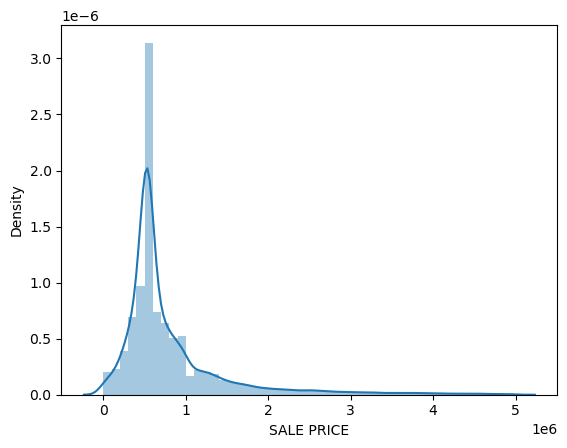

In [50]:
sns.distplot(df3['SALE PRICE'])

Sale Price berdistribusi normal

# Confidence Interval

In [51]:
df.groupby("BOROUGH").agg({"GROSS SQUARE FEET": [np.mean, np.std, np.size]})

GROSS SQUARE FEET                    
                           mean          std   size
BOROUGH                                            
Manhattan           4115.371864   625.293898  17450
Bronx               1562.775063  1489.458028   4788
Brooklyn            1341.869666  1566.014972  15069
Queens              2705.017895  1287.883757  25941
Staten Island       2133.033324  1131.115652   7848

In [54]:
# Queens
mean_ = 2705.01 
std_ = 1287.88
n_ = 25941
z = 1.96 #z-score from the z table

In [55]:
se = std_ / np.sqrt(n_)

In [56]:
lcb = mean_ - z* se  #lower limit of the CI
ucb = mean_ + z* se  #upper limit of the CI
lcb, ucb

(2689.3375059573636, 2720.682494042637)

GROSS SQUARE FEET True Mean Queens: 2689.3375059573636 dan 2720.682494042637

# Hypothesis Testing

Analisis hubungan harga rata rata per unit antara Queens dan Bronx?
- H0 = Tidak ada perbedaan secara signifikan pada harga rata rata per unit antara borough Queens dan Bronx
- H1 = Terdapat perbedaan secara signifikan pada harga rata rata per unit antara borugh Queens dan Bronx

In [57]:
df_borough = df.groupby('BOROUGH', axis=0).sum()
df_borough

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,19239411,13529299,13441,637,14846,6.675044e+07,7.181324e+07,3.492153e+10
Bronx,20494606,1476967,6867,282,7157,9.284021e+06,7.482567e+06,2.167431e+09
Brooklyn,63331497,5747361,21181,1195,22617,1.991708e+07,2.022063e+07,1.519868e+10
Queens,172162827,6059317,30111,3665,34602,8.834028e+07,7.017087e+07,1.520164e+10
Staten Island,25388162,1645731,9396,279,9697,2.869862e+07,1.674005e+07,3.858650e+09


In [59]:
queens = df[df['BOROUGH']=='Queens']
bronx = df[df['BOROUGH']=='Bronx']

In [61]:
total_unit_bronx = df_borough.iloc[1, 4]
mu_bronx = bronx['SALE PRICE'].mean()
std_bronx = bronx['SALE PRICE'].std()
total_unit_bronx, mu_bronx, std_bronx

(7157, 452679.90935672517, 780709.0013980328)

In [62]:
total_unit_queens = df_borough.iloc[-2, 4]
mu_queens = queens['SALE PRICE'].mean()
std_queens = queens['SALE PRICE'].std()
total_unit_queens, mu_queens, std_queens

(34602, 586008.4399599091, 1189039.534944722)

In [63]:
from statsmodels.stats.weightstats import ztest
ztest, pval= ztest(queens['SALE PRICE'],bronx['SALE PRICE'])
print("pval: ",float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

pval:  8.173213850006335e-14
reject null hypothesis


Dengan hasil ini dapat ditarik kesimpulan bahwa terdapat perbedaan yang cukup signifikan pada harga rata-rata per unit antara Queens dengan Bronx